# **Project 1: Student Score Prediction**
***Hafiz Syed Sharjeel Najam***

*Machine Learning Intern - Elevvo Pathways*

This project focuses on building machine learning models to predict student exam scores based on study-related features. Starting with simple linear regression, the project explored multiple approaches to minimize bias and improve prediction accuracy.

---

# Setup and Dataset Download

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import plotly.express as px
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

100%|██████████| 93.9k/93.9k [00:00<00:00, 63.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/9


In [ ]:
df = pd.read_csv(r'/root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/9/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Data Analysis and Cleaning
- Removed missing values from dataset.
- `Object` Dtype is converted into `bool` and `int` by encoding.
- Analyzed all the obtained features and their importance with target i.e. `Exam_Score`.
- Dropped the features which are less important or having correlation near to zero with target.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
print(f'Teacher Quality Values: {df['Teacher_Quality'].unique()}')
print(f'Parental Education Values: {df['Parental_Education_Level'].unique()}')
print(f'Distance from Home Values: {df['Distance_from_Home'].unique()}')

Teacher Quality Values: ['Medium' 'High' 'Low' nan]
Parental Education Values: ['High School' 'College' 'Postgraduate' nan]
Distance from Home Values: ['Near' 'Moderate' 'Far' nan]


In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [ ]:
for feature in categorical_features:
    print(f'{feature} unique values: {df[feature].unique()}')

Parental_Involvement unique values: ['Low' 'Medium' 'High']
Access_to_Resources unique values: ['High' 'Medium' 'Low']
Extracurricular_Activities unique values: ['No' 'Yes']
Motivation_Level unique values: ['Low' 'Medium' 'High']
Internet_Access unique values: ['Yes' 'No']
Family_Income unique values: ['Low' 'Medium' 'High']
Teacher_Quality unique values: ['Medium' 'High' 'Low' nan]
School_Type unique values: ['Public' 'Private']
Peer_Influence unique values: ['Positive' 'Negative' 'Neutral']
Learning_Disabilities unique values: ['No' 'Yes']
Parental_Education_Level unique values: ['High School' 'College' 'Postgraduate' nan]
Distance_from_Home unique values: ['Near' 'Moderate' 'Far' nan]
Gender unique values: ['Male' 'Female']


In [ ]:
boolean_features = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']
one_hot_encode_features = ['School_Type', 'Gender']
label_encode_features = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence',
                         'Parental_Education_Level', 'Distance_from_Home']

In [ ]:
for feature in boolean_features:
    df[feature] = df[feature].map({'Yes': 1, 'No': 0})

In [ ]:
for feature in one_hot_encode_features:
    df = pd.get_dummies(df, columns=[feature], prefix=[feature])

In [ ]:
label_encoder = LabelEncoder()
for feature in label_encode_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [ ]:
df = df.dropna(axis=1)

In [ ]:
df[1:10]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,School_Type_Private,School_Type_Public,Gender_Female,Gender_Male
1,19,64,1,2,0,8,59,1,1,2,...,0,4,0,0,1,61,False,True,True,False
2,24,98,2,2,1,7,91,2,1,2,...,1,4,0,2,2,74,False,True,False,True
3,29,89,1,2,1,8,98,2,1,1,...,0,4,0,1,1,71,False,True,False,True
4,19,92,2,2,1,6,65,2,1,3,...,1,4,0,0,2,70,False,True,True,False
5,19,88,2,2,1,8,89,2,1,3,...,2,3,0,2,2,71,False,True,False,True
6,29,84,2,1,1,7,68,1,1,1,...,1,2,0,1,1,67,True,False,False,True
7,25,78,1,0,1,6,50,2,1,1,...,0,2,0,1,0,66,False,True,False,True
8,17,94,2,0,0,6,80,0,1,0,...,1,1,0,0,2,69,True,False,False,True
9,23,98,2,2,1,8,71,2,1,0,...,2,5,0,1,1,72,False,True,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  Teacher_Quality             6607 non-null   int64
 12  Peer_Influence              6607 non-null   int64
 13  Physical_Activity           6607 non-null   int64
 14  Learning

In [ ]:
df.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,1.220070,1.203421,0.596035,7.02906,75.070531,1.307553,0.924474,1.493719,1.211442,1.322991,1.190858,2.967610,0.105191,0.923717,1.508552,67.235659
std,5.990594,11.547475,0.865634,0.871783,0.490728,1.46812,14.399784,0.782515,0.264258,1.230570,0.742264,0.912020,0.755876,1.031231,0.306823,0.739806,0.685173,3.890456
min,1.000000,60.000000,0.000000,0.000000,0.000000,4.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,0.000000,0.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,1.000000,2.000000,67.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,0.000000,1.000000,2.000000,69.000000
max,44.000000,100.000000,2.000000,2.000000,1.000000,10.00000,100.000000,2.000000,1.000000,8.000000,2.000000,3.000000,2.000000,6.000000,1.000000,3.000000,3.000000,101.000000


## Correlation Matrix to check feature importance

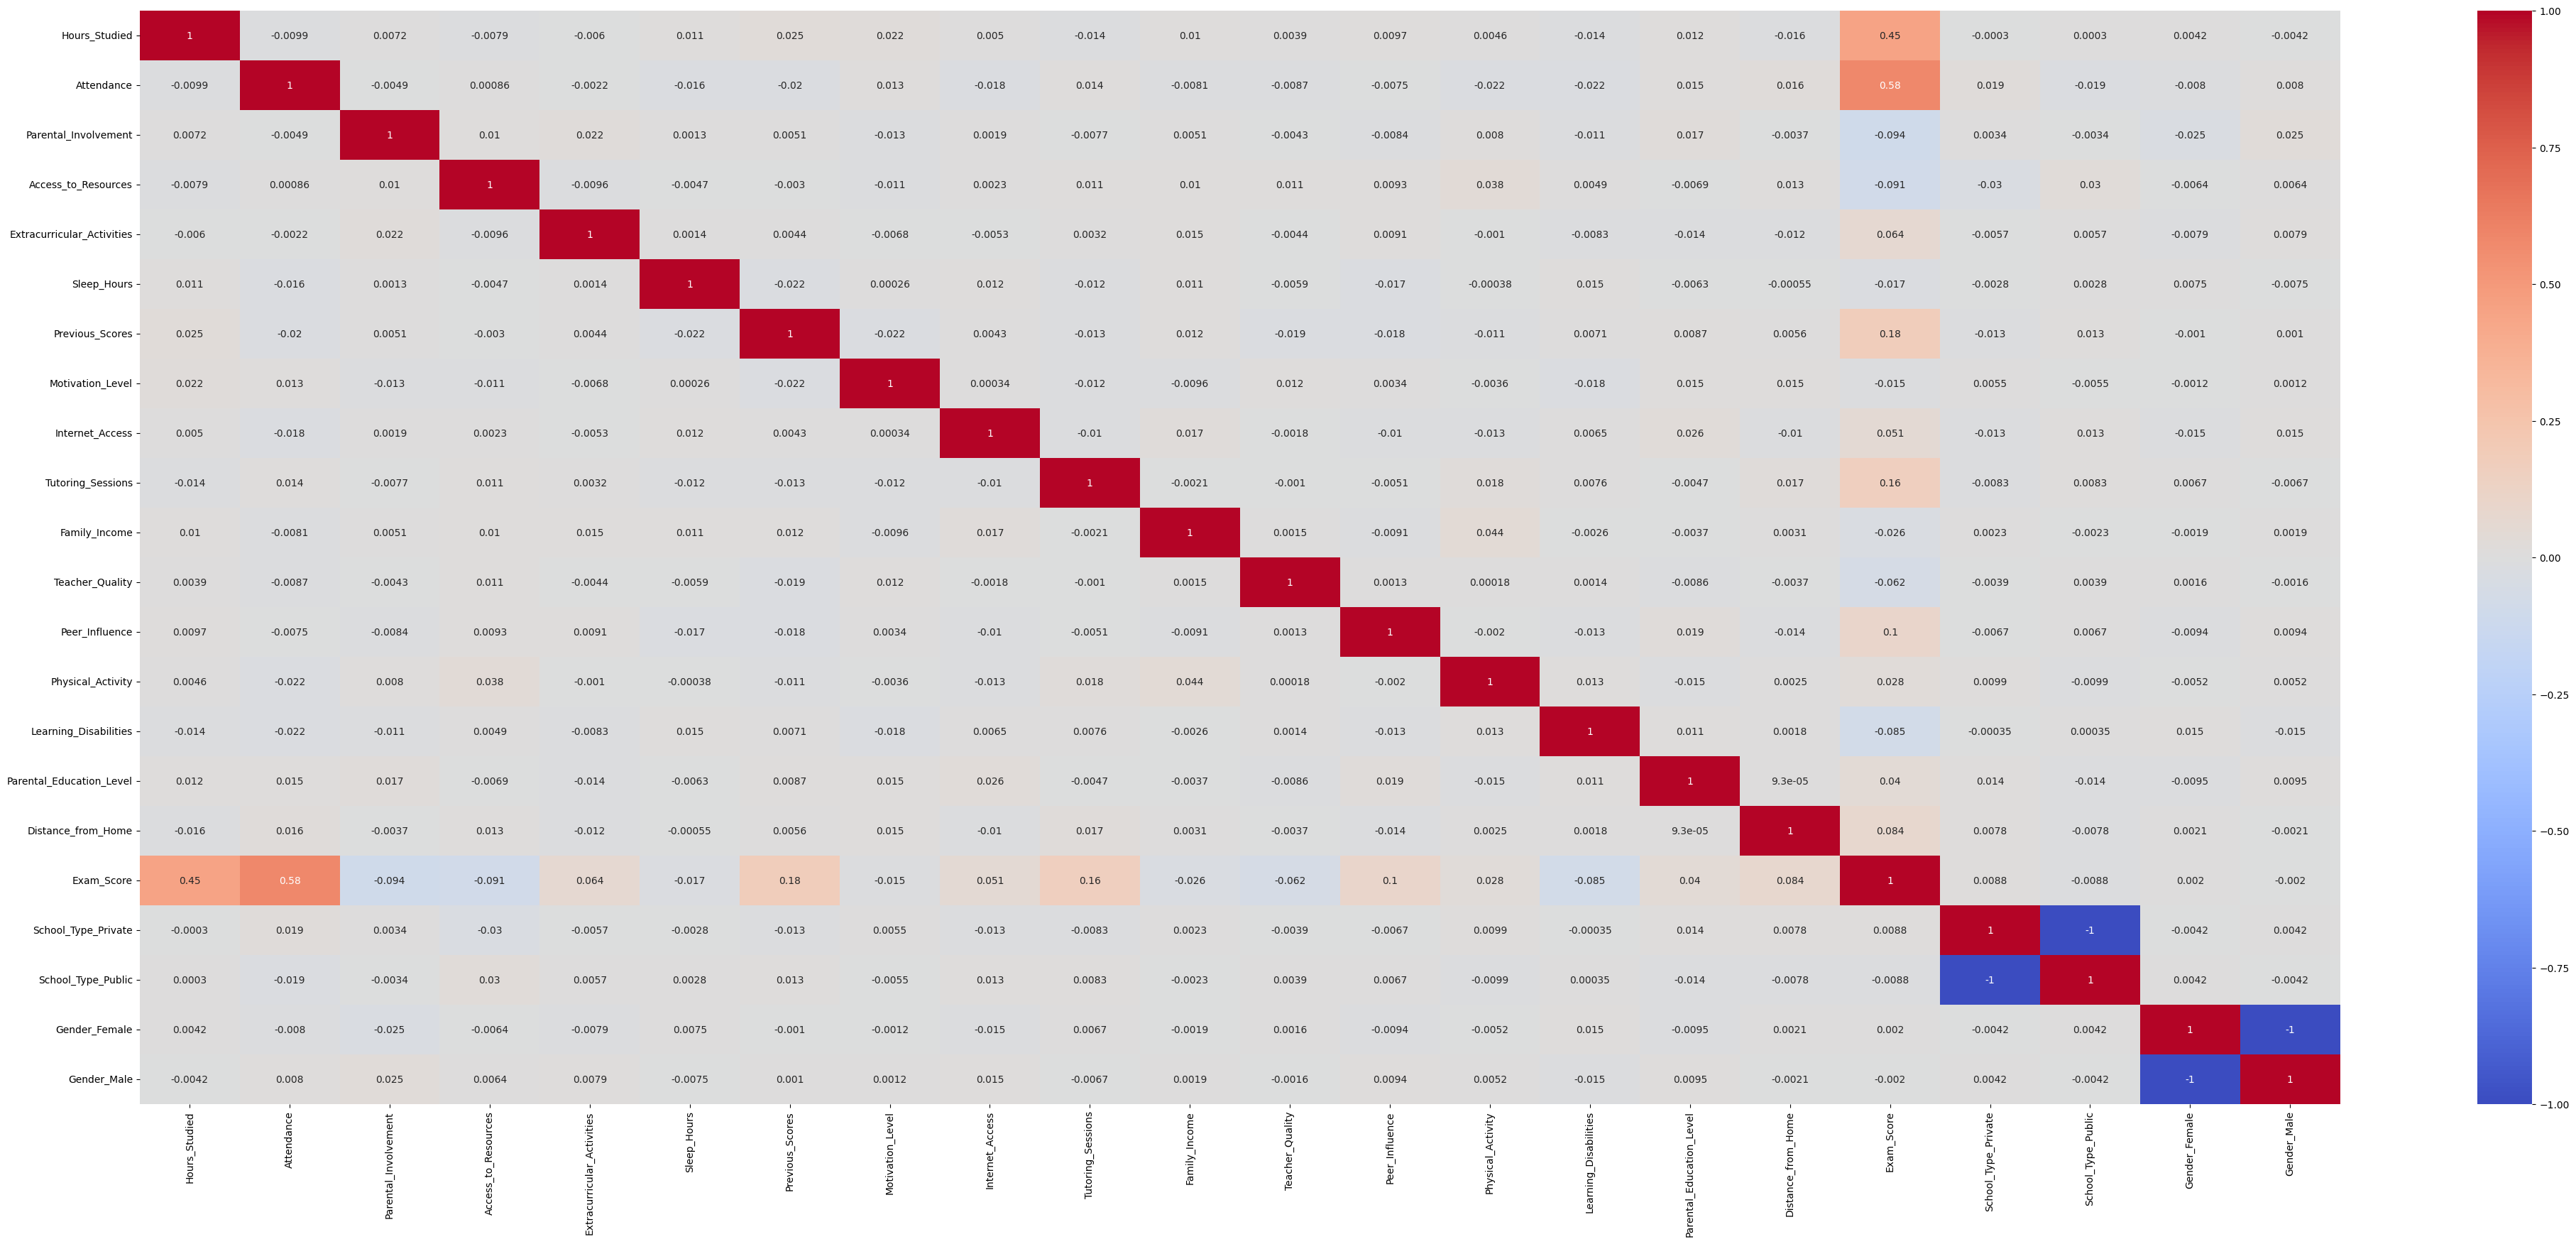

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(50, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

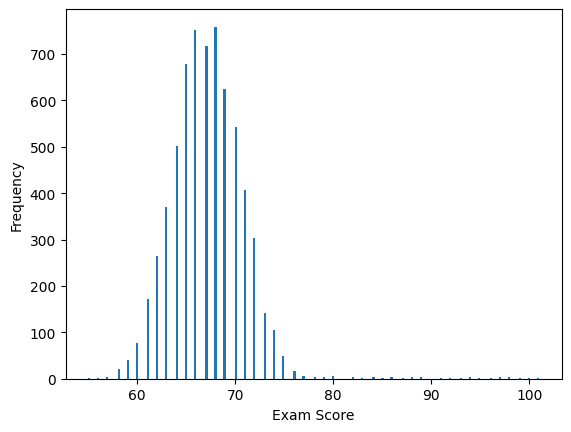

In [ ]:
plt.hist(df['Exam_Score'], bins=200)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df = df.drop(['Internet_Access', 'Sleep_Hours', 'Gender_Male', 'Gender_Female', 'School_Type_Private', 'School_Type_Public'], axis=1)

In [ ]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Machine Learning and Model Selection

- Split the dataset into training and test sets using `train_test_split`.
- Three models are trained which are:
    1. Linear Regression
    2. Linear Regression with Polynomial features
    3. Random Forest Regressor
    4. XGBRegressor
- The models are evaluated on the basis of `Mean Squared Error`, and Visualizing Predicted and Actual Values

## Linear Regression

4.084798083791571


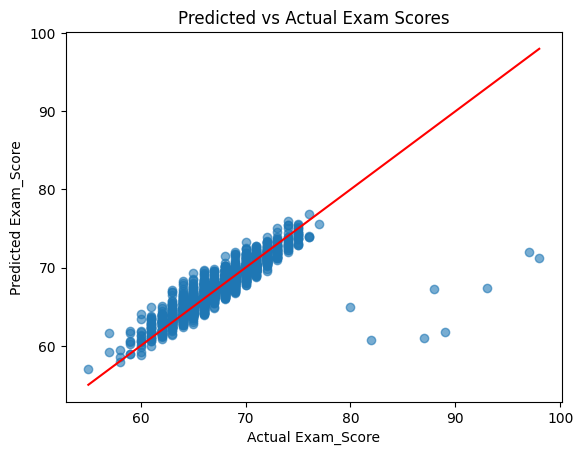

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model_ll = LinearRegression()
model_ll.fit(X_train, y_train)
y_pred_ll = model_ll.predict(X_test)
mse_ll = mean_squared_error(y_test, y_pred_ll)
print(mse_ll)
plt.scatter(y_test, y_pred_ll, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')  # diagonal line
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

## Linear Regression with Polynomial Features

3.1286117405425857


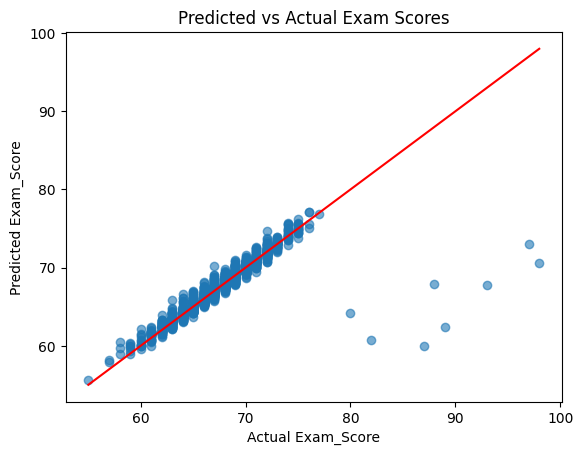

In [ ]:
X_poly = PolynomialFeatures(degree=2).fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.25, random_state=42)
model_ll_poly = LinearRegression()
model_ll_poly.fit(X_train_poly, y_train_poly)
y_pred_ll_poly = model_ll_poly.predict(X_test_poly)
mse_ll_poly = mean_squared_error(y_test_poly, y_pred_ll_poly)
print(mse_ll_poly)
plt.scatter(y_test_poly, y_pred_ll_poly, alpha=0.6)
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], 'r-')
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

## Random Forest Regressor

4.342460389830508


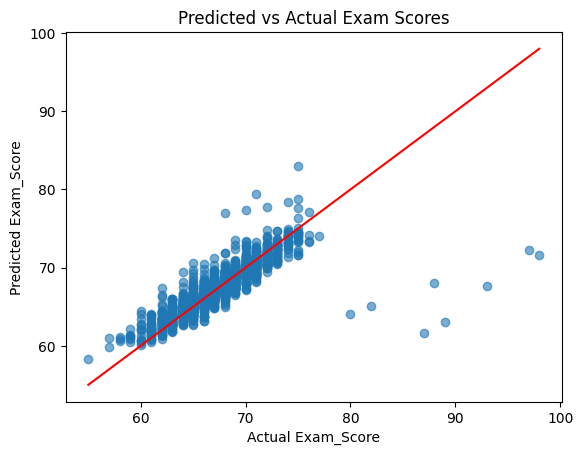

In [ ]:
rfr = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print(mse_rfr)
plt.scatter(y_test, y_pred_rfr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

## XGBoost Regressor

3.96863055229187


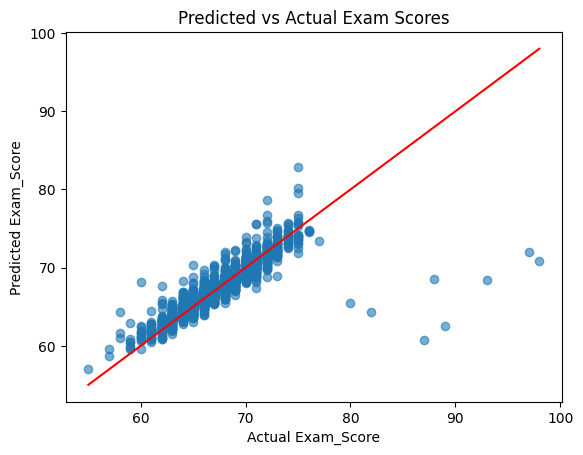

In [ ]:
xgb = XGBRegressor(n_estimators=20, n_jobs=3)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(mse_xgb)
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

## Evaluation Result

After Evaluation of all three models following results obtained:
1. Linear Regression (mse = 4.085)
2. Linear Regression with Polynomial Features (mse = 3.129)
3. Random Forest Regressor (mse = 4.827)
4. XGB Regressor (mse = 3.969)

For further refinement and accuracy the target `Exam_Score` is transformed by taking the logarithm

## Steps for further accuracy

In [ ]:
y_transformed = np.log(y)

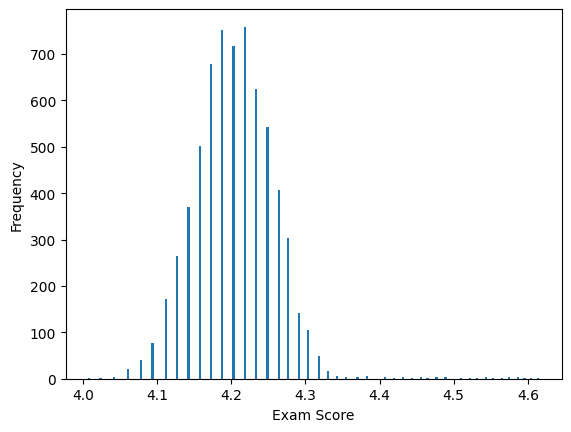

In [ ]:
plt.hist(y_transformed, bins=200)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

## Linear Regression

0.0007583604491950921


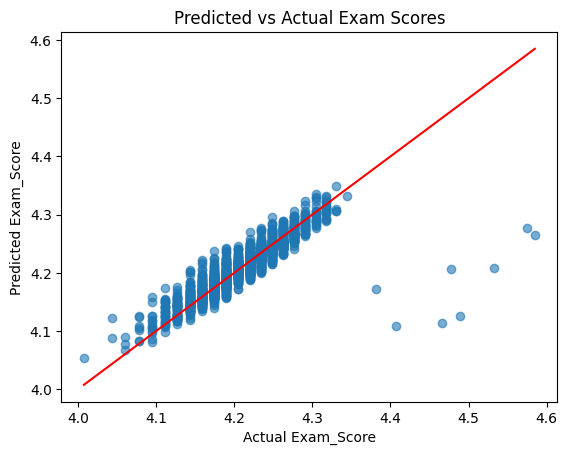

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.25, random_state=42)
model_ll = LinearRegression()
model_ll.fit(X_train, y_train)
y_pred_ll = model_ll.predict(X_test)
mse_ll = mean_squared_error(y_test, y_pred_ll)
print(mse_ll)
plt.scatter(y_test, y_pred_ll, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')  # diagonal line
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

## Linear Regression with Polynomial Features

0.0005422137326013846


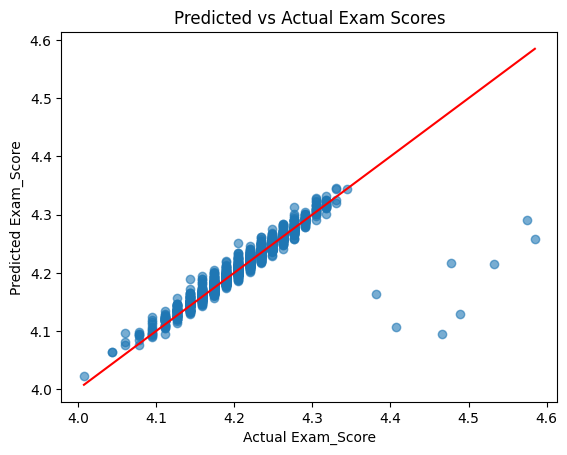

In [ ]:
X_poly = PolynomialFeatures(degree=2).fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_transformed, test_size=0.25, random_state=42)
model_ll_poly = LinearRegression()
model_ll_poly.fit(X_train_poly, y_train_poly)
y_pred_ll_poly = model_ll_poly.predict(X_test_poly)
mse_ll_poly = mean_squared_error(y_test_poly, y_pred_ll_poly)
print(mse_ll_poly)
plt.scatter(y_test_poly, y_pred_ll_poly, alpha=0.6)
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], 'r-')
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

## Random Forest Regressor

0.0007883109260552675


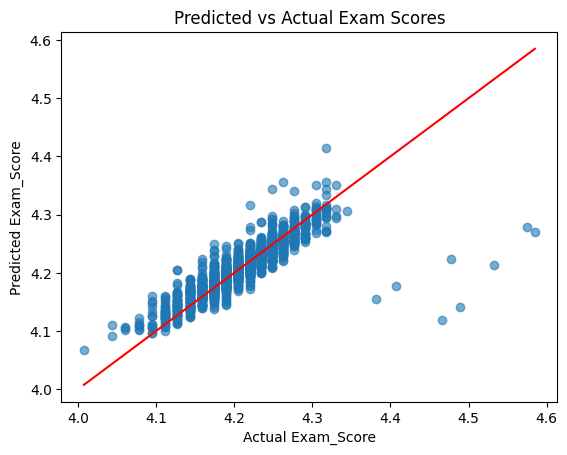

In [ ]:
rfr = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print(mse_rfr)
plt.scatter(y_test, y_pred_rfr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

## XGBoost Regressor

0.0007031957073415949


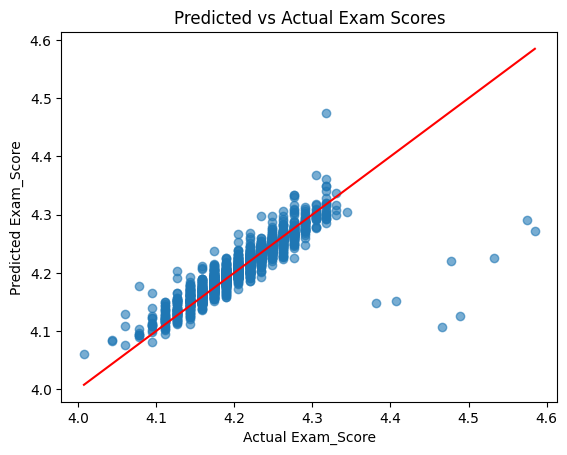

In [ ]:
xgb = XGBRegressor(n_estimators=20, n_jobs=3)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(mse_xgb)
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

## Correlation Matrix Visualization

In [ ]:
corr = df.corr(numeric_only=True)['Exam_Score'].sort_values(ascending=False)

fig = px.bar(
    x=corr.index,
    y=corr.values,
    labels={'x': 'Features', 'y': 'Correlation with Exam_Score'},
    title="Feature Correlation with Exam_Score"
)
fig.show()

Check for Overfitting or Underfitting

In [ ]:
print("Train MSE:", mean_squared_error(y_train_poly, model_ll_poly.predict(X_train_poly)))
print("Test MSE :", mean_squared_error(y_test_poly, y_pred_ll_poly))

Train MSE: 0.0007692556396729084
Test MSE : 0.0005422137326013846


## Final Evaluation

After taking logarithm of our target, models were trained again yielded following results:
1. Linear Regression (mse = 0.0008)
2. Linear Regression with Polynomial Features (mse = 0.0005)
3. Random Forest Regressor (mse = 0.0008)
4. XGB Regressor (mse = 0.0007)

However, these values indicated for chance of overfitting which was checked by calculating `Train MSE` and `Test MSE` which are:

Train MSE: 0.0008

Test MSE: 0.0005